## Mutual Information Acquisition Function Starter

In [1]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt

### Simple Function Example

For more details see Scikit-Optimize's Bayesian Optimization example [1].

[1] https://scikit-optimize.github.io/notebooks/bayesian-optimization.html

In [2]:
noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) + np.random.randn() * noise_level

### Plot of the Unknown Function

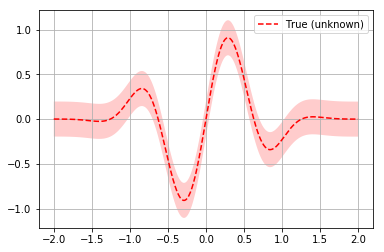

In [3]:
# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], 
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()

### Gaussian Process with Expected Improvement

In [4]:
from skopt import gp_minimize

# Search bounds for both acquisition functions
dimensions = [(-2.0, 2.0)]

res_ei = gp_minimize(f,                        # the function to minimize
                     dimensions=dimensions,    # the bounds on each dimension of x
                     acq_func="EI",            # the acquisition function
                     n_calls=15,               # the number of evaluations of f 
                     n_random_starts=10,       # the number of random initialization points
                     #noise=0.1**2,            # the noise level (optional)
                     random_state=123,         # the random seed
                     verbose=True)         

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0014
Function value obtained: -0.1659
Current minimum: -0.1659
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0008
Function value obtained: 0.2878
Current minimum: -0.1659
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0002
Function value obtained: 0.0739
Current minimum: -0.1659
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0002
Function value obtained: 0.6885
Current minimum: -0.1659
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0002
Function value obtained: -0.3353
Current minimum: -0.3353
Iteration No: 6 started. Eva

In [5]:
res_ei.fun

-0.90684130222687853

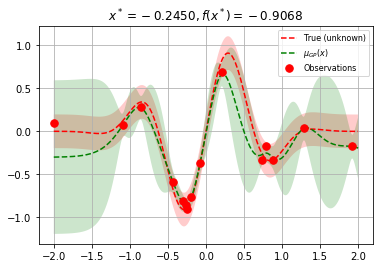

In [6]:
plt.rcParams["figure.figsize"] = (6, 4)

# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
x_gp = res_ei.space.transform(x.tolist())

fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], 
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")

# Plot GP(x) + contours
gp = res_ei.models[-1]
y_pred, sigma = gp.predict(x_gp, return_std=True)

plt.plot(x, y_pred, "g--", label=r"$\mu_{GP}(x)$")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma, 
                         (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.2, fc="g", ec="None")

# Plot sampled points
plt.plot(res_ei.x_iters, 
         res_ei.func_vals, 
         "r.", markersize=15, label="Observations")

plt.title(r"$x^* = %.4f, f(x^*) = %.4f$" % (res_ei.x[0], res_ei.fun))
plt.legend(loc="best", prop={'size': 8}, numpoints=1)
plt.grid()

plt.show()

### Gaussian Process with Mutual Information

In [7]:
from skopt import gp_minimize

res = gp_minimize(f,                        # the function to minimize
                  dimensions=dimensions,    # the bounds on each dimension of x
                  acq_func="MI",            # the acquisition function
                  n_calls=15,               # the number of evaluations of f 
                  n_random_starts=10,       # the number of random initialization points
                  #noise=0.1**2,            # the noise level (optional)
                  random_state=123,         # the random seed
                  verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0012
Function value obtained: -0.3342
Current minimum: -0.3342
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0004
Function value obtained: 0.2858
Current minimum: -0.3342
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0004
Function value obtained: 0.1043
Current minimum: -0.3342
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0005
Function value obtained: 0.6992
Current minimum: -0.3342
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0006
Function value obtained: -0.3815
Current minimum: -0.3815
Iteration No: 6 started. Eva

In [8]:
res.fun

-1.027201064853333

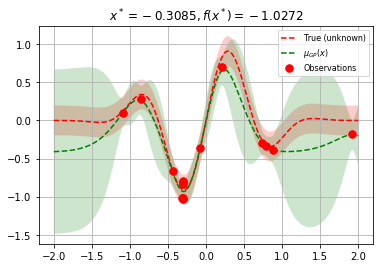

In [9]:
plt.rcParams["figure.figsize"] = (6, 4)

# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
x_gp = res.space.transform(x.tolist())

fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], 
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")

# Plot GP(x) + contours
gp = res.models[-1]
y_pred, sigma = gp.predict(x_gp, return_std=True)

plt.plot(x, y_pred, "g--", label=r"$\mu_{GP}(x)$")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma, 
                         (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.2, fc="g", ec="None")

# Plot sampled points
plt.plot(res.x_iters, 
         res.func_vals, 
         "r.", markersize=15, label="Observations")

plt.title(r"$x^* = %.4f, f(x^*) = %.4f$" % (res.x[0], res.fun))
plt.legend(loc="best", prop={'size': 8}, numpoints=1)
plt.grid()

plt.show()

## Looking at the Branin Function

Let's see how things look with a slightly more complicated function. 

### Gaussian Process with Expected Improvement

In [15]:
from skopt.benchmarks import branin

dimensions = [(-5.0, 10.0), (0.0, 15.0)]

branin_ei = gp_minimize(branin,                   # the function to minimize
                        dimensions=dimensions,    # the bounds on each dimension of x
                        acq_func="EI",            # the acquisition function
                        n_calls=40,               # the number of evaluations of f 
                        n_random_starts=10,       # the number of random initialization points
                        #noise=0.1**2,            # the noise level (optional)
                        random_state=123,         # the random seed
                        verbose=False)

/Users/youngtodd/scikit-optimize/skopt/optimizer/optimizer.py:365: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [16]:
branin_ei.fun

0.57290933827025015

### Gaussian Process with Mutual Information

In [17]:
branin_mi = gp_minimize(branin,                   # the function to minimize
                        dimensions=dimensions,    # the bounds on each dimension of x
                        acq_func="MI",            # the acquisition function
                        n_calls=40,               # the number of evaluations of f 
                        n_random_starts=10,       # the number of random initialization points
                        #noise=0.1**2,            # the noise level (optional)
                        random_state=123,         # the random seed
                        verbose=False)

/Users/youngtodd/scikit-optimize/skopt/learning/gaussian_process/gpr.py:323: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/youngtodd/scikit-optimize/skopt/learning/gaussian_process/gpr.py:323: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/youngtodd/scikit-optimize/skopt/learning/gaussian_process/gpr.py:323: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/youngtodd/scikit-optimize/skopt/learning/gaussian_process/gpr.py:323: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [18]:
branin_mi.fun

0.39837964217890232

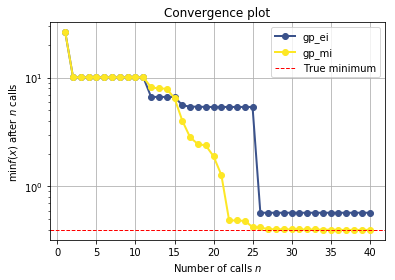

In [19]:
from skopt.plots import plot_convergence

plot = plot_convergence(("gp_ei", branin_ei),
                        ("gp_mi", branin_mi), 
                        true_minimum=0.397887, yscale="log")